In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 200
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
from sklearn.datasets import make_blobs, make_circles, make_moons

In [3]:
rng = np.random.RandomState(6)
X_blobs, y_blobs = make_blobs(n_samples=200, random_state=1)
X_blobs = scale(X_blobs @ rng.normal(0, 4, size=(2, 2)))
X_circles, y_circles = make_circles(n_samples=400, random_state=0, noise=.09, factor=.4)
X_circles = scale(X_circles)
X_moons, y_moons = make_moons(n_samples=200, random_state=0, noise=.09)
X_moons = scale(X_moons)


In [4]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import adjusted_rand_score, silhouette_score, normalized_mutual_info_score, adjusted_mutual_info_score

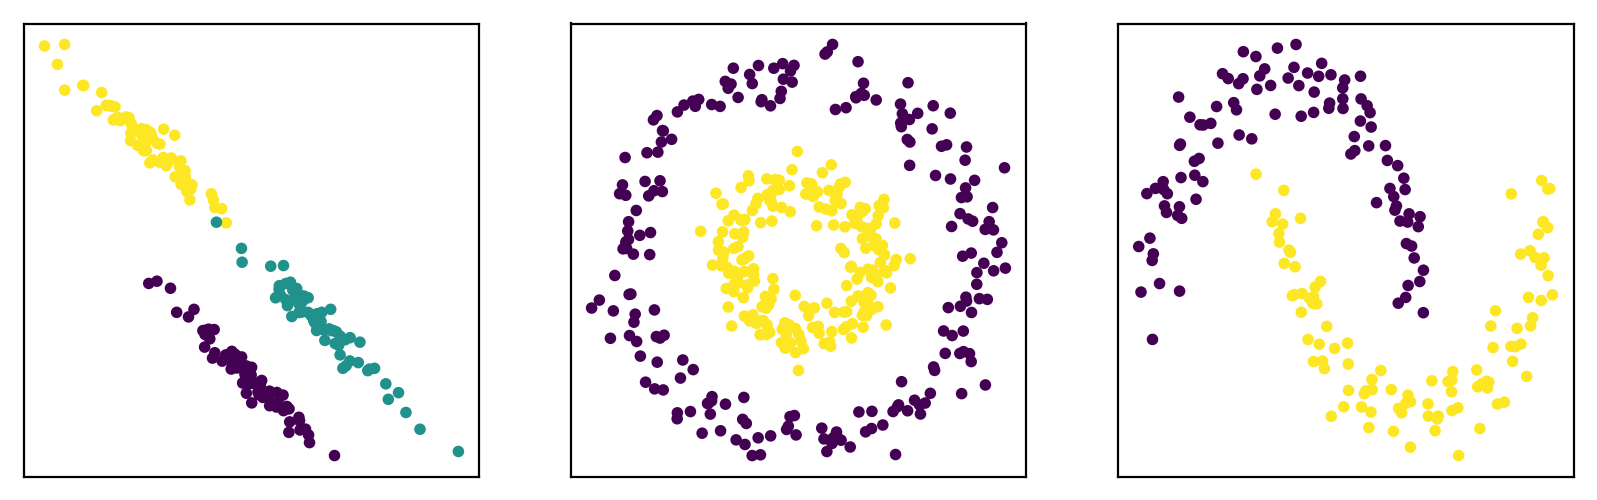

In [5]:
fig, axes = plt.subplots(1, 3, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 3))
for ax, (X, y) in zip(axes, [(X_blobs, y_blobs), (X_circles, y_circles), (X_moons, y_moons)]):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=10)

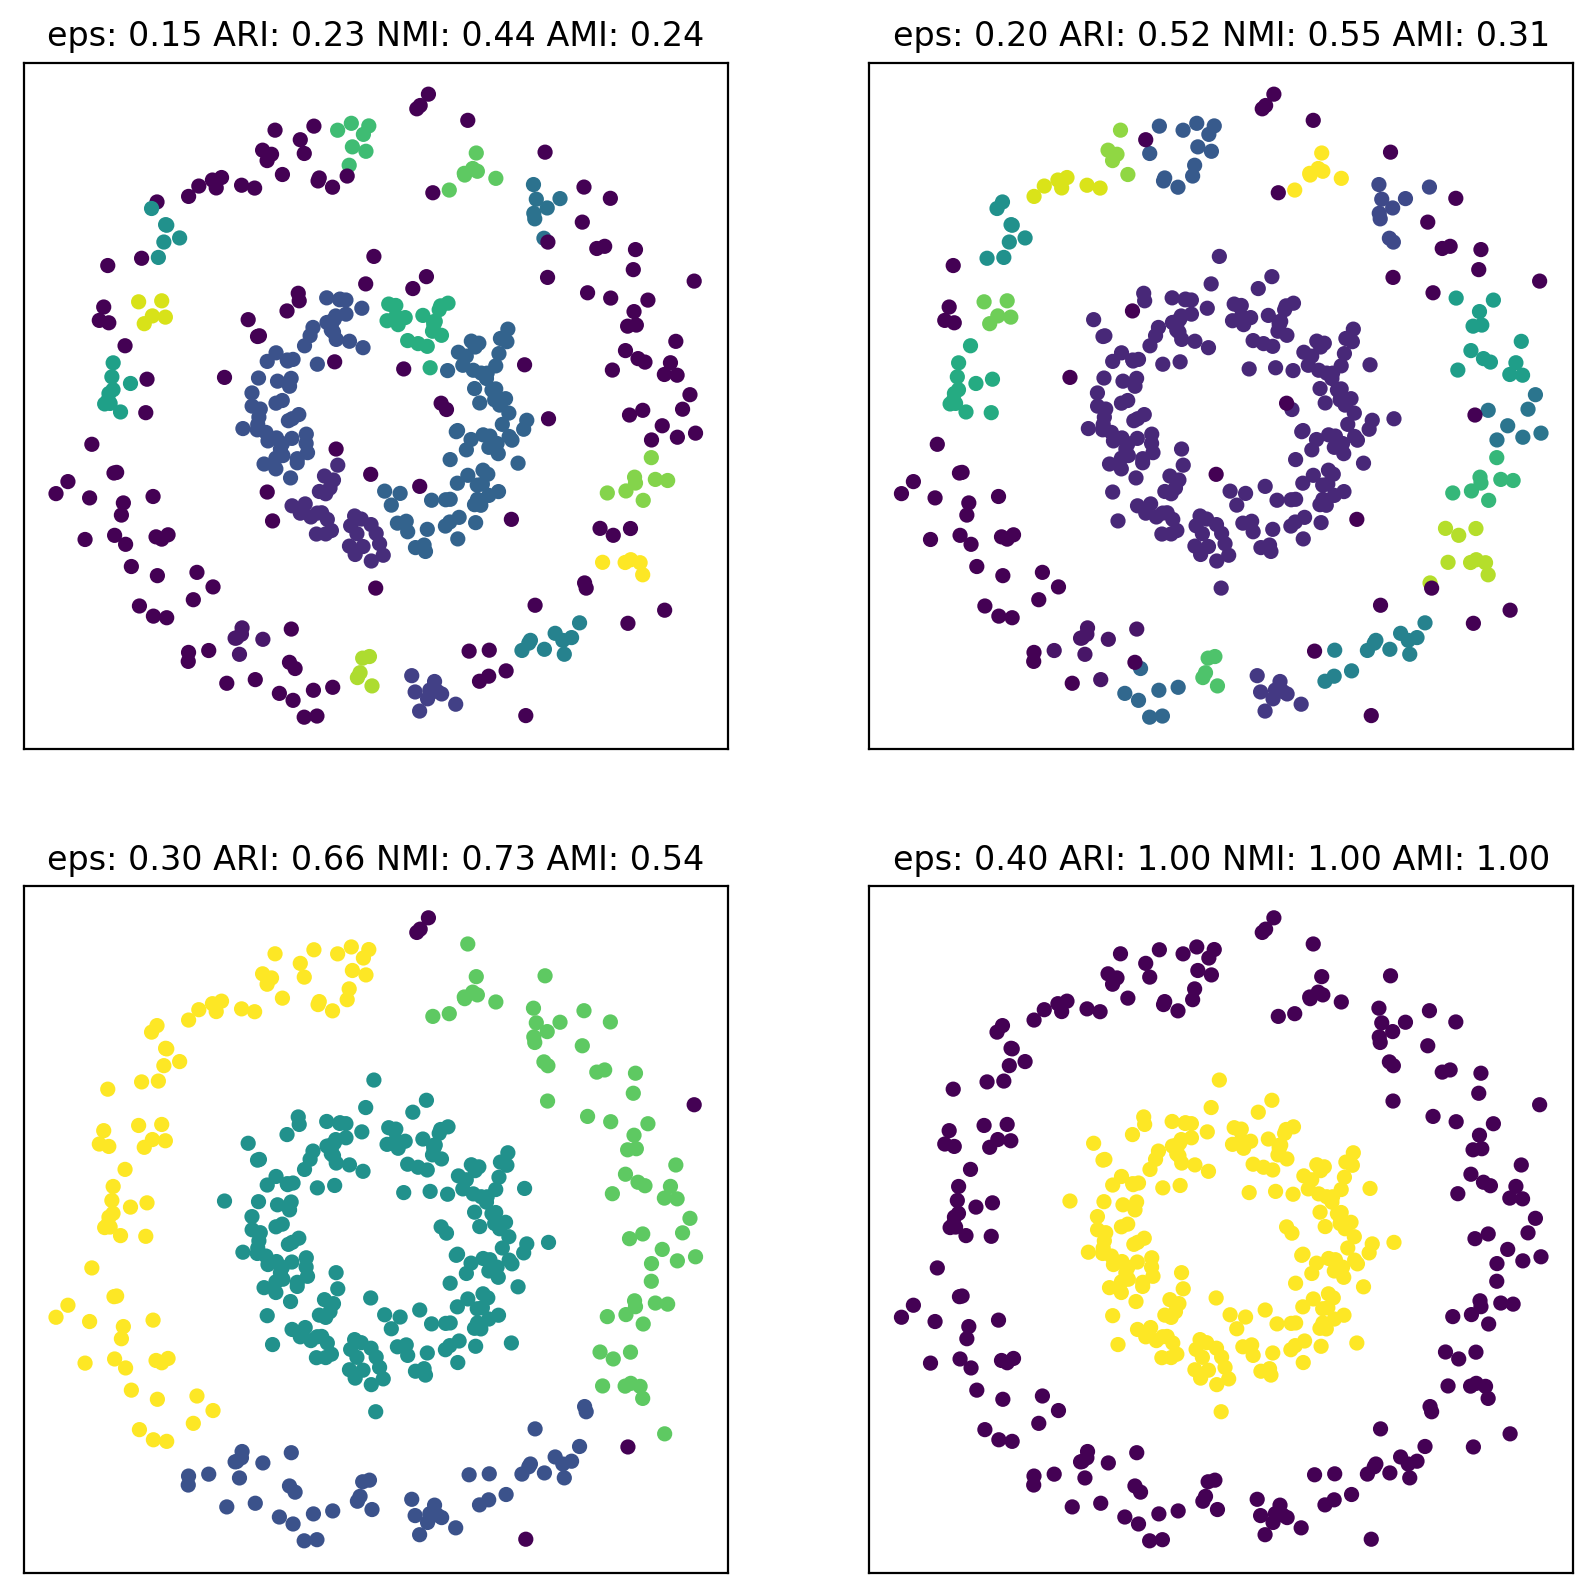

In [6]:
fig, axes = plt.subplots(2, 2, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 10))
for ax, eps in zip(axes.ravel(), [.15, .2, .3, .4]):
    dbs = DBSCAN(eps=eps).fit(X_circles)
    ari = adjusted_rand_score(y_circles, dbs.labels_)
    nmi = normalized_mutual_info_score(y_circles, dbs.labels_)
    ami = adjusted_mutual_info_score(y_circles, dbs.labels_)
    ax.set_title("eps: {:.2f} ARI: {:.2f} NMI: {:.2f} AMI: {:.2f}".format(eps, ari, nmi, ami))
    ax.scatter(X_circles[:, 0], X_circles[:, 1], c=dbs.labels_, s=20)

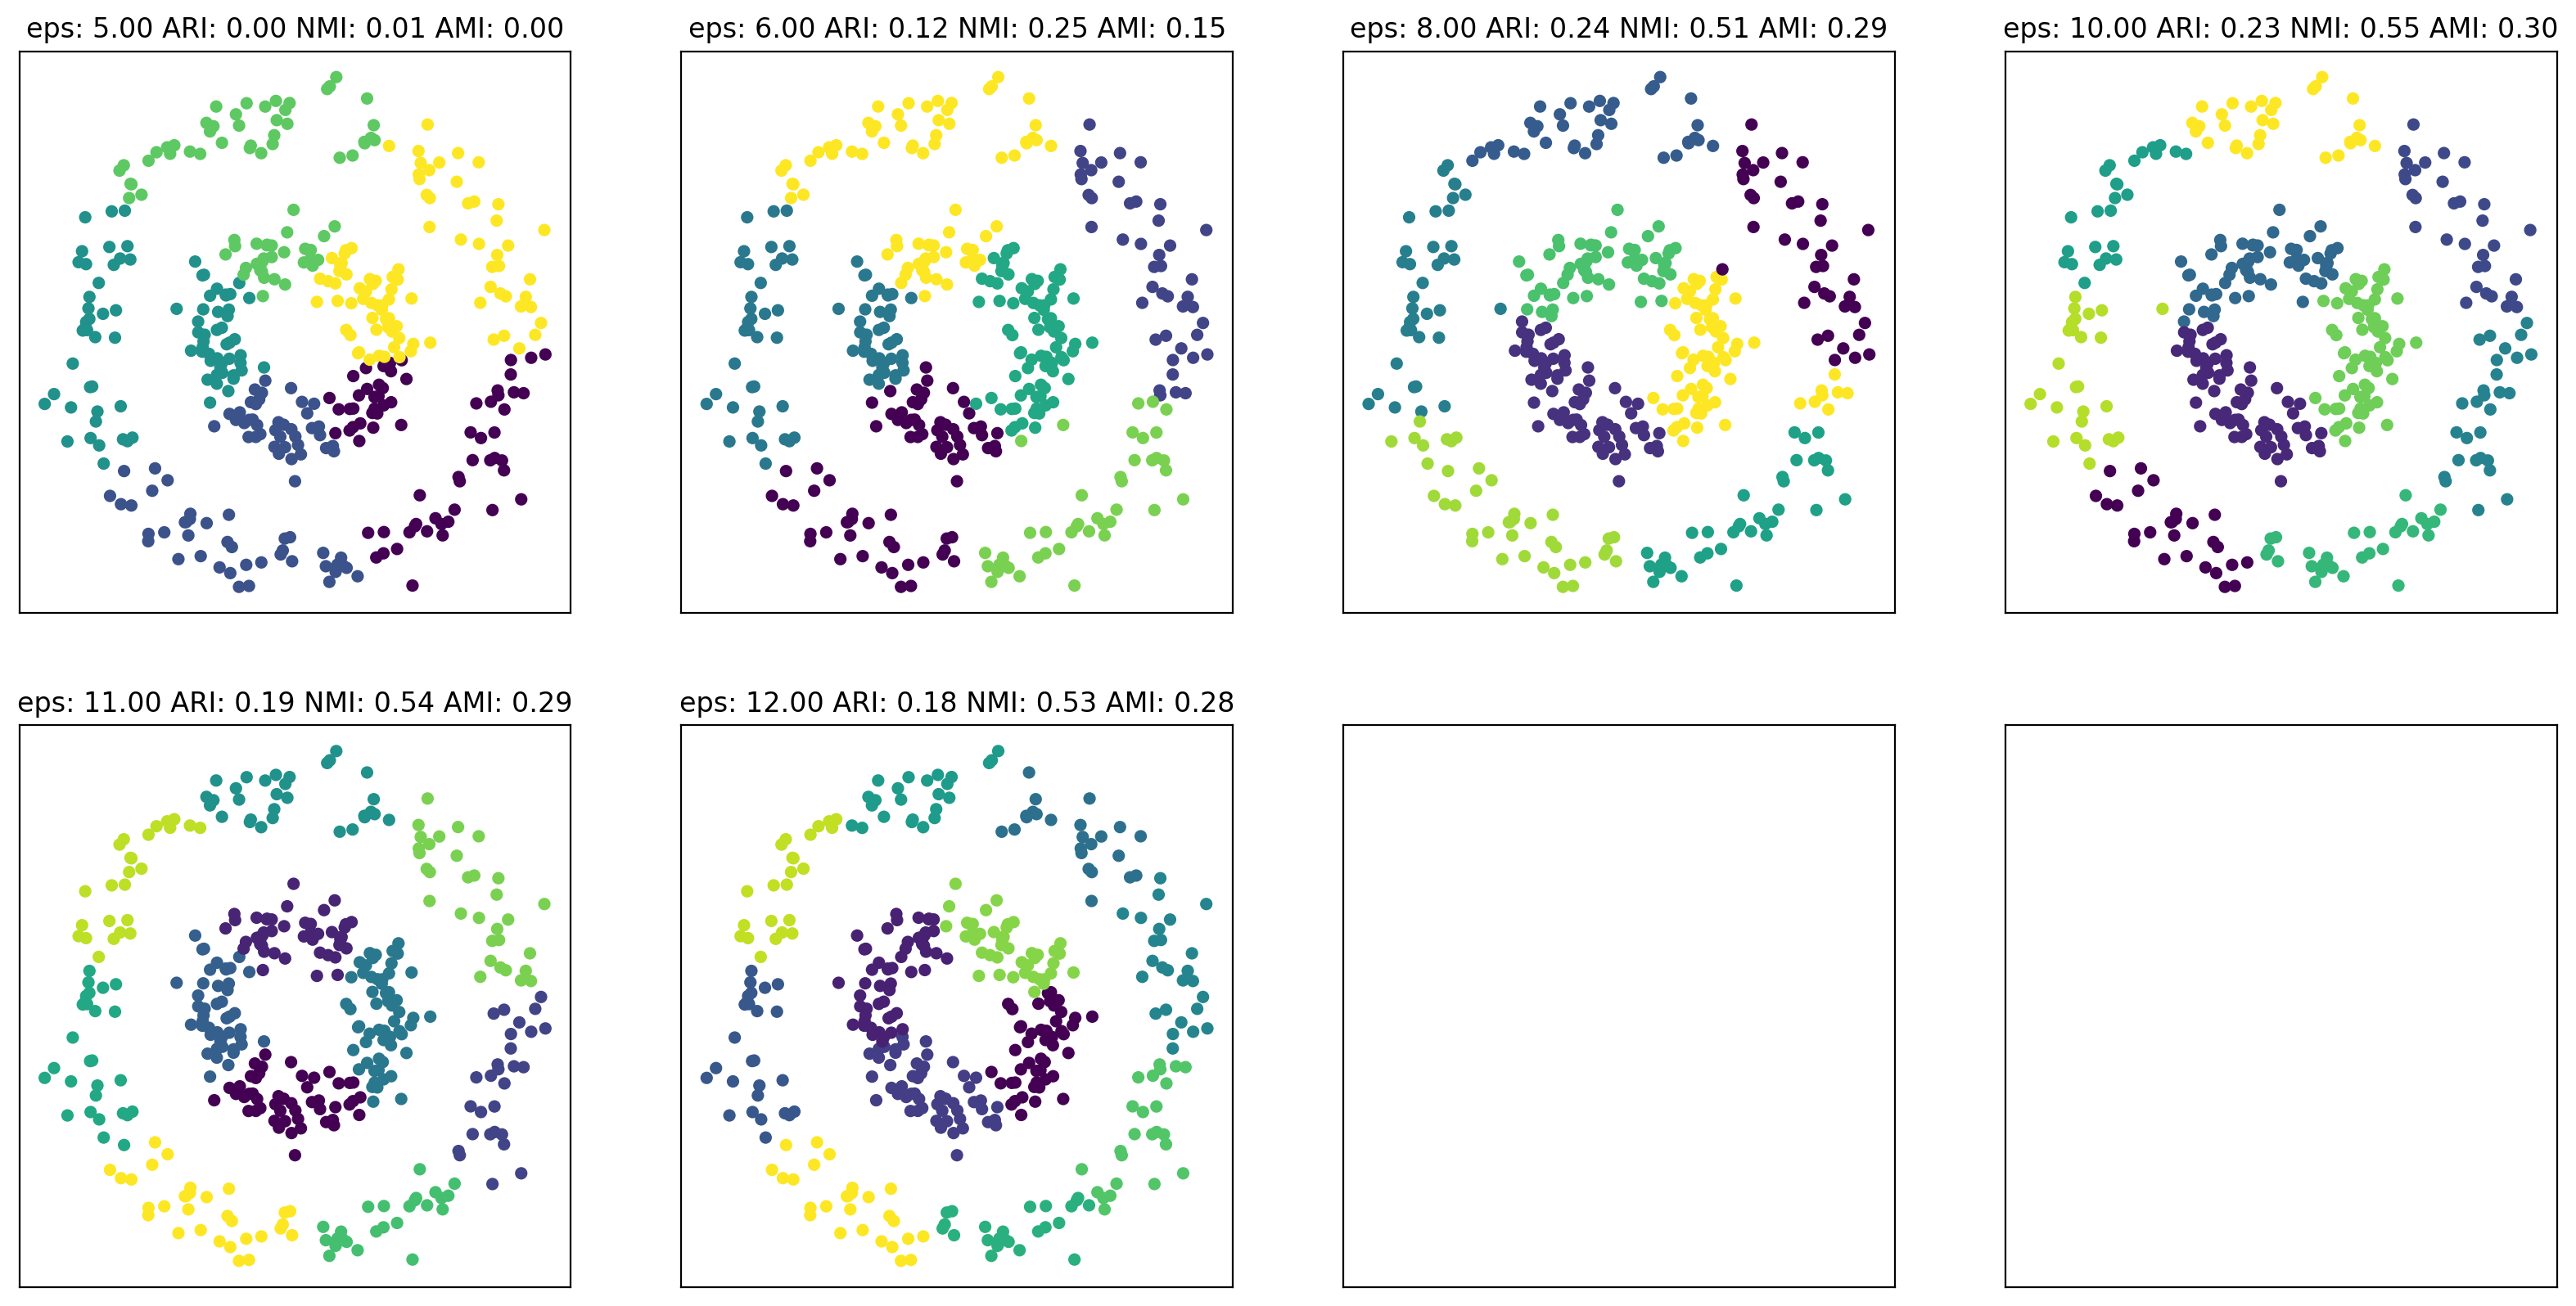

In [7]:
fig, axes = plt.subplots(2, 4, subplot_kw={'xticks': (), 'yticks':()}, figsize=(20, 10))
for ax, eps in zip(axes.ravel(), [5, 6, 8, 10, 11, 12]):
    dbs = KMeans(n_clusters=eps).fit(X_circles)
    ari = adjusted_rand_score(y_circles, dbs.labels_)
    nmi = normalized_mutual_info_score(y_circles, dbs.labels_)
    ami = adjusted_mutual_info_score(y_circles, dbs.labels_)
    ax.set_title("eps: {:.2f} ARI: {:.2f} NMI: {:.2f} AMI: {:.2f}".format(eps, ari, nmi, ami))
    ax.scatter(X_circles[:, 0], X_circles[:, 1], c=dbs.labels_, s=20)

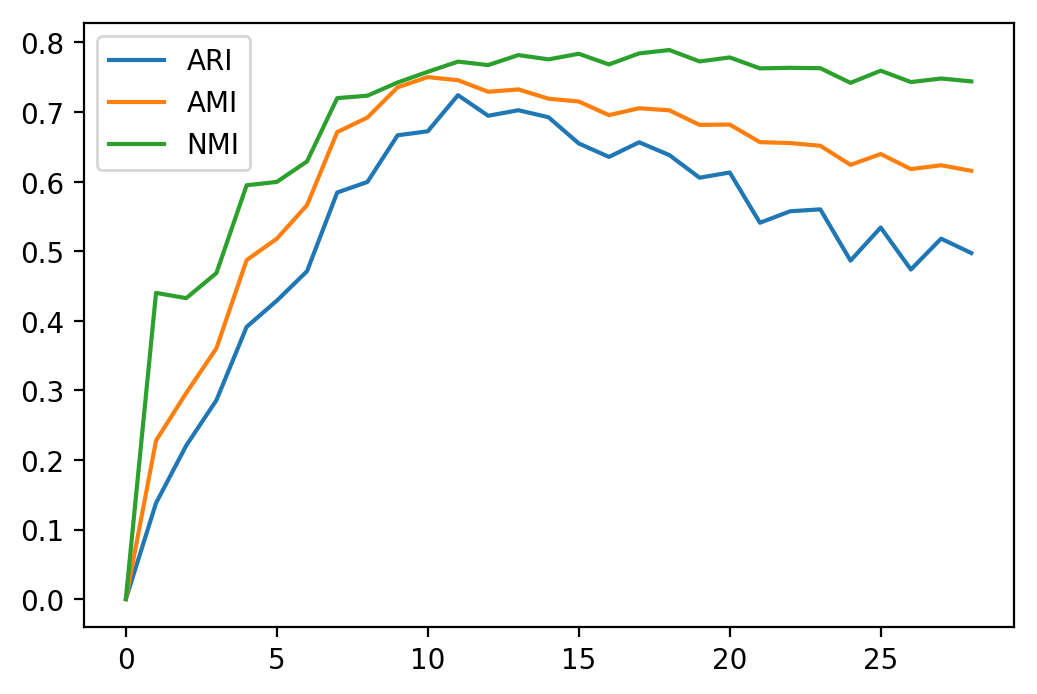

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
aris, nmis, amis = [], [], []
for i in range(1, 30):
    km = KMeans(n_clusters=i).fit(digits.data)
    ari = adjusted_rand_score(digits.target, km.labels_)
    nmi = normalized_mutual_info_score(digits.target, km.labels_)
    ami = adjusted_mutual_info_score(digits.target, km.labels_)
    aris.append(ari)
    nmis.append(nmi)
    amis.append(ami)
plt.plot(aris, label="ARI")
plt.plot(amis, label="AMI")
plt.plot(nmis, label="NMI")
plt.legend()

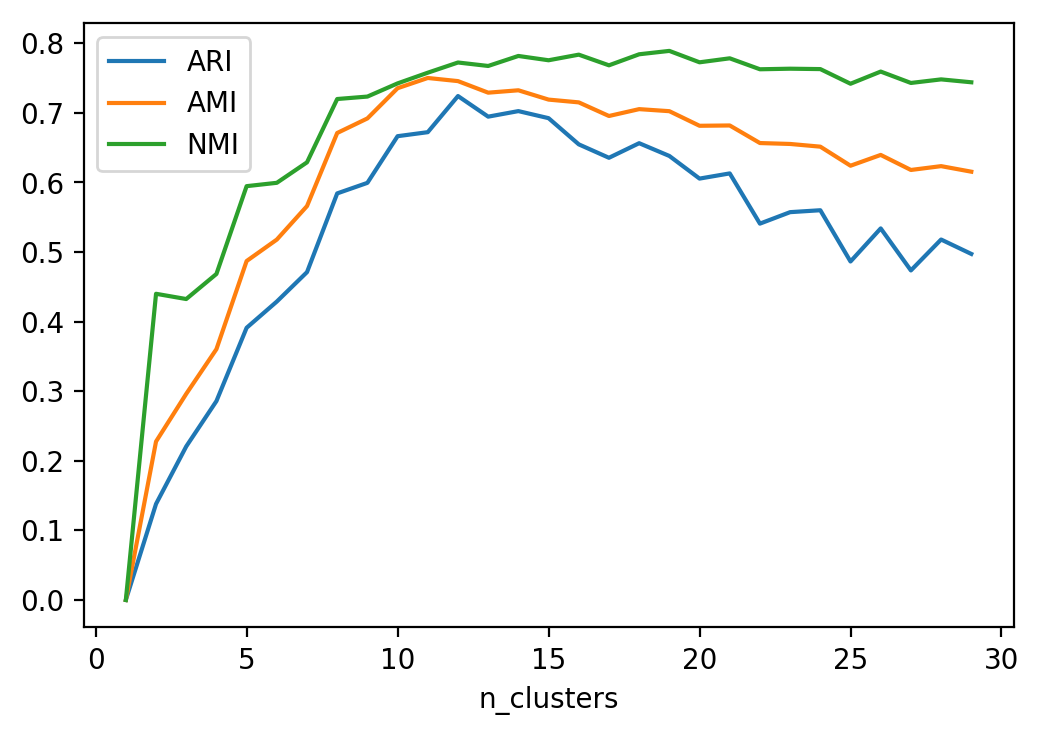

In [9]:
plt.plot(range(1, 30), aris, label="ARI")
plt.plot(range(1, 30), amis, label="AMI")
plt.plot(range(1, 30), nmis, label="NMI")
plt.legend()
plt.xlabel("n_clusters")

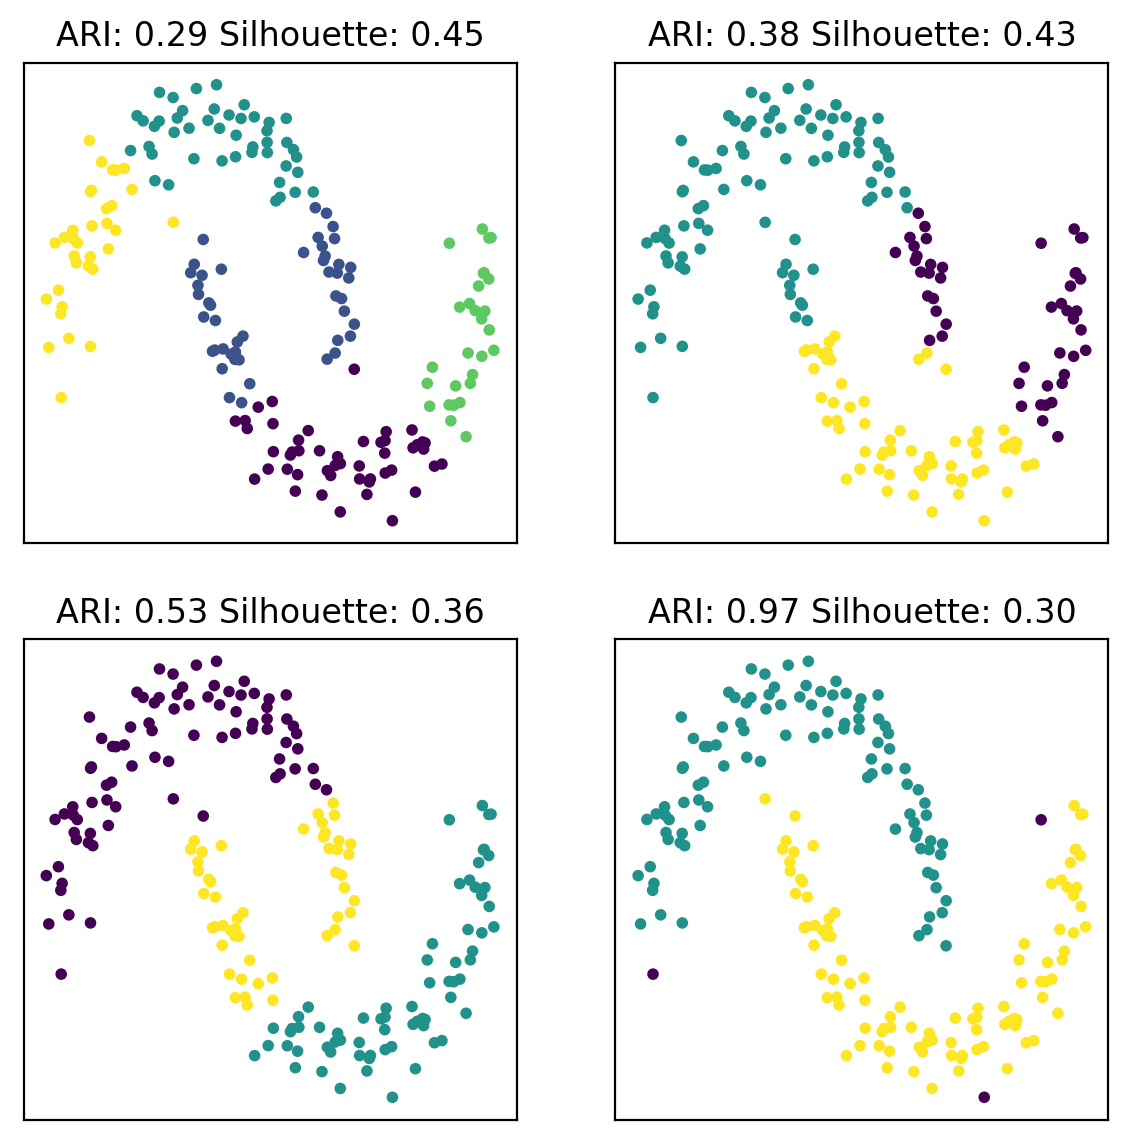

In [10]:
fig, axes = plt.subplots(2, 2, subplot_kw={'xticks': (), 'yticks':()}, figsize=(7, 7))
agg = AgglomerativeClustering(n_clusters=3, connectivity=lambda x: kneighbors_graph(x, 10))

for ax, alg in zip(axes.ravel(), [KMeans(n_clusters=5), KMeans(n_clusters=3), agg, DBSCAN(eps=.3)]):
    alg.fit(X)
    ax.scatter(X[:, 0], X[:, 1], c=alg.labels_, s=10)
    #ax.set_aspect("equal")
    ari = adjusted_rand_score(y, alg.labels_)
    silhouette = silhouette_score(X, alg.labels_)
    ax.set_title("ARI: {:.2f} Silhouette: {:.2f}".format(ari, silhouette))


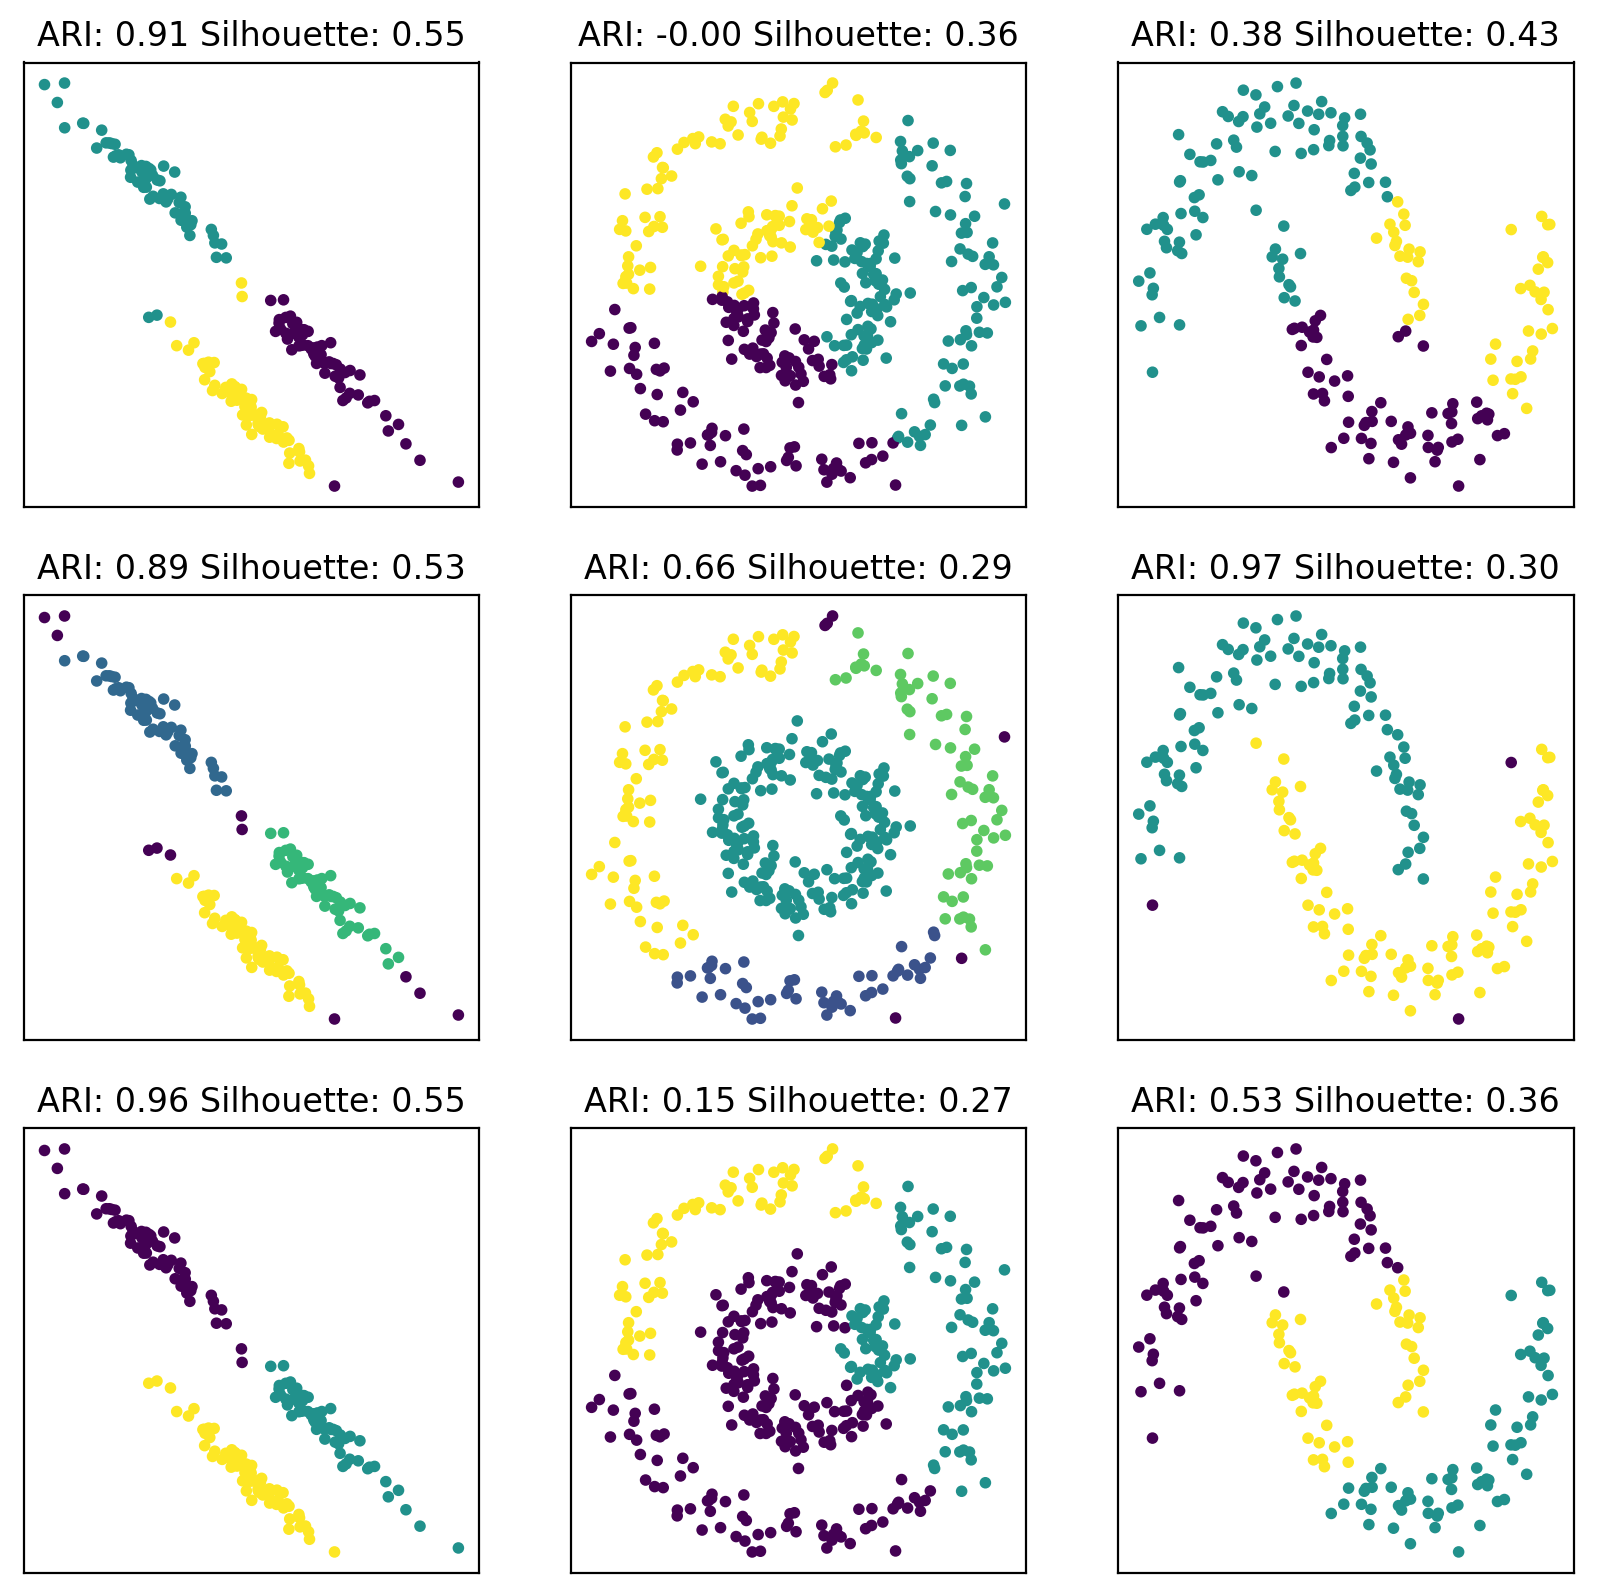

In [11]:
fig, axes = plt.subplots(3, 3, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 10))
agg = AgglomerativeClustering(n_clusters=3, connectivity=lambda x: kneighbors_graph(x, 10))
for axes2, alg in zip(axes, [KMeans(n_clusters=3), DBSCAN(eps=.3), agg]):
    for ax, (X, y) in zip(axes2, [(X_blobs, y_blobs), (X_circles, y_circles), (X_moons, y_moons)]):
        alg.fit(X)
        ax.scatter(X[:, 0], X[:, 1], c=alg.labels_, s=10)
        #ax.set_aspect("equal")
        ari = adjusted_rand_score(y, alg.labels_)
        silhouette = silhouette_score(X, alg.labels_)
        ax.set_title("ARI: {:.2f} Silhouette: {:.2f}".format(ari, silhouette))


In [21]:
from sklearn.metrics import silhouette_samples

def silhouette_plot(X, cluster_labels, ax=None):
    silhouette_scores = silhouette_samples(X, cluster_labels)
    if ax is None:
        ax = plt.gca()
    y_lower = 10
    inliers = cluster_labels != -1
    X = X[inliers]
    cluster_labels = cluster_labels[inliers]
    silhouette_scores = silhouette_scores[inliers]
    labels = np.unique(cluster_labels)
    for i in labels:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            silhouette_scores[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.Vega10(i)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

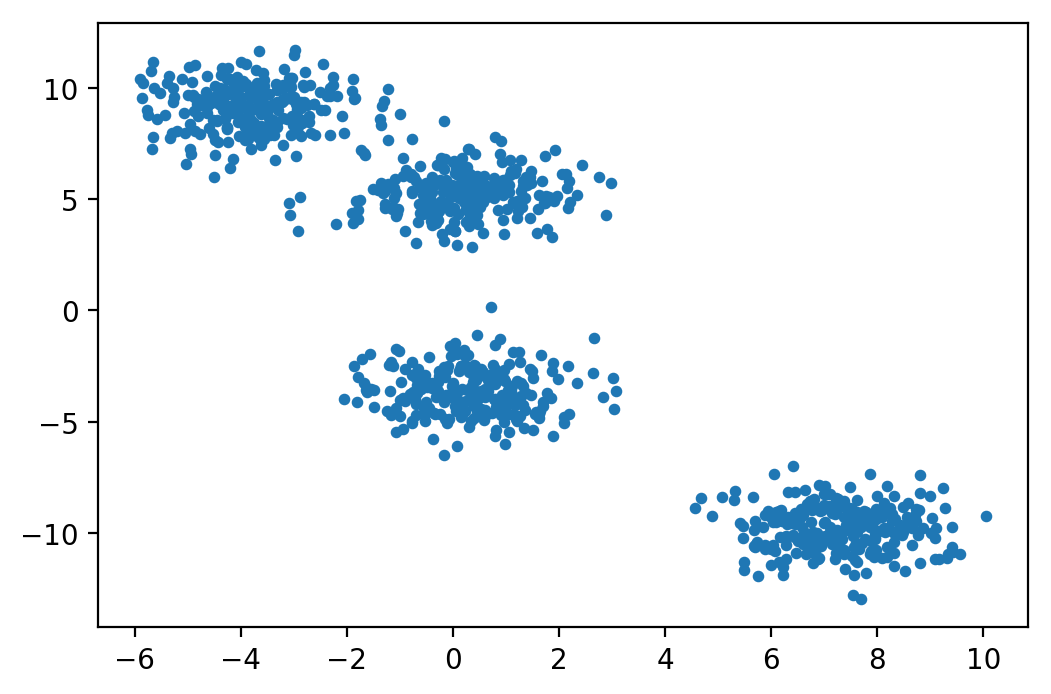

In [13]:
    X, y = make_blobs(n_samples=1000, centers=4, random_state=14)
plt.scatter(X[:, 0], X[:, 1], s=10)

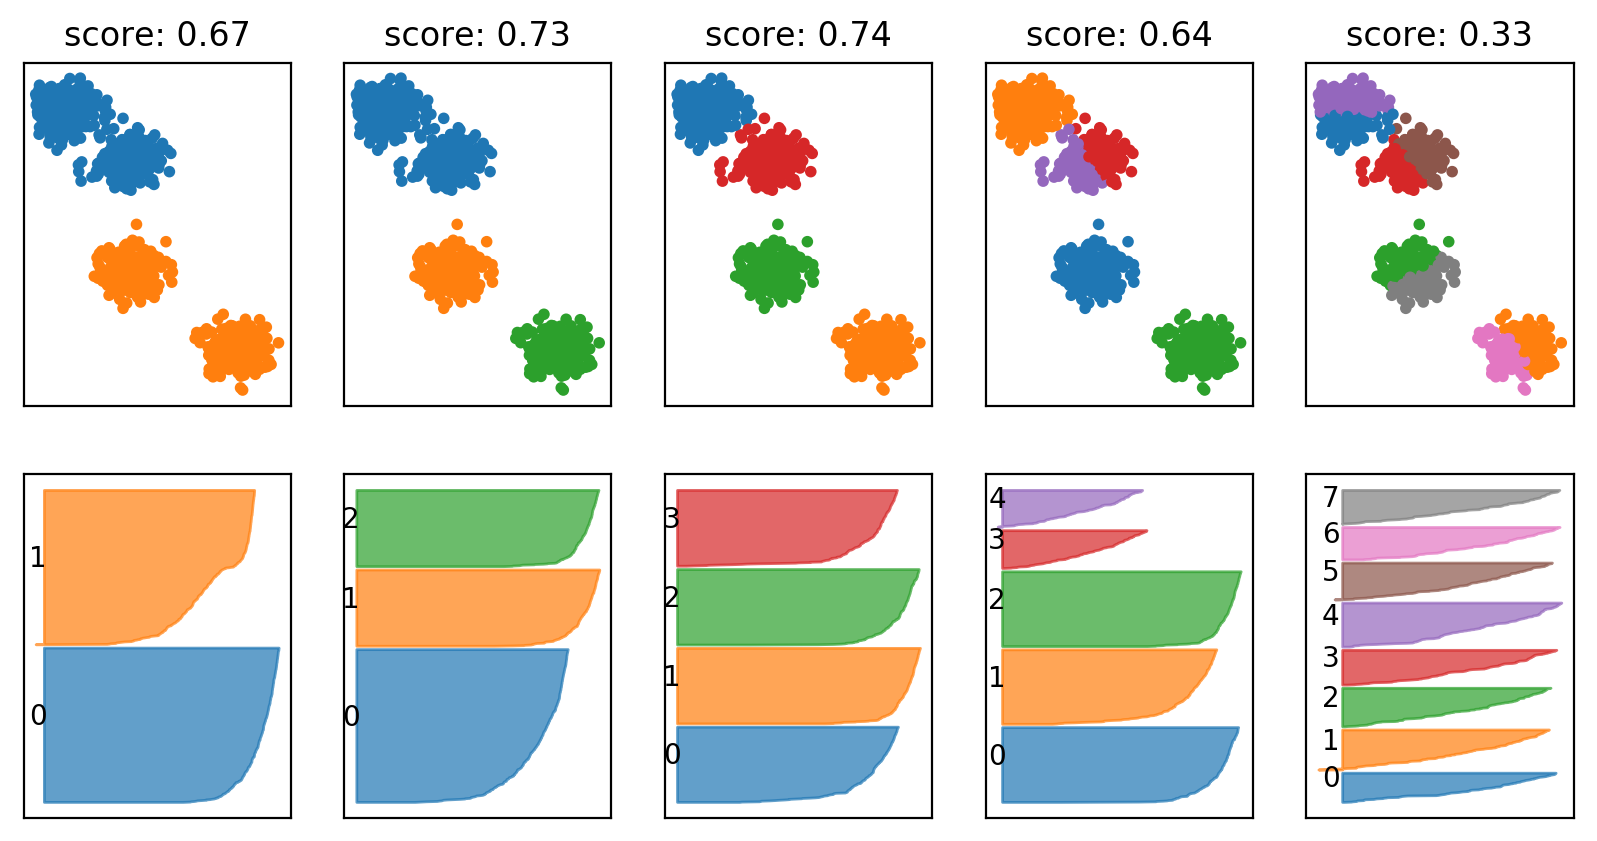

In [14]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 5))
for ax, n_clusters in zip(axes.T, [2, 3, 4, 5, 8]):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    ax[0].scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(km.labels_), s=10)
    silhouette_plot(X, km.labels_, ax=ax[1])
    ax[0].set_title("score: {:.2f}".format(silhouette_score(X, km.labels_)))

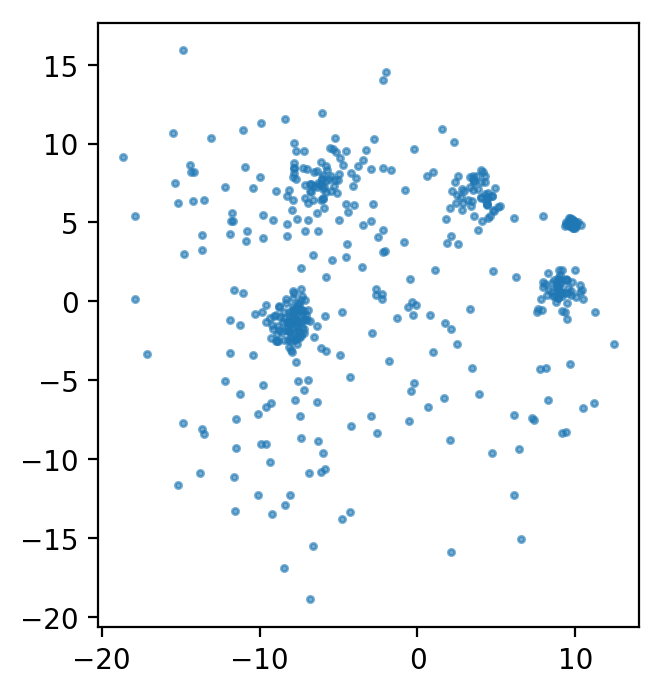

In [15]:
rng = np.random.RandomState(1)
X, y = make_blobs(n_samples=500, centers=10, random_state=rng, cluster_std=[rng.gamma(2) for i in range(10)])
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6)
plt.gca().set_aspect("equal")
#plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y), s=5, alpha=.6)
xlim = plt.xlim()

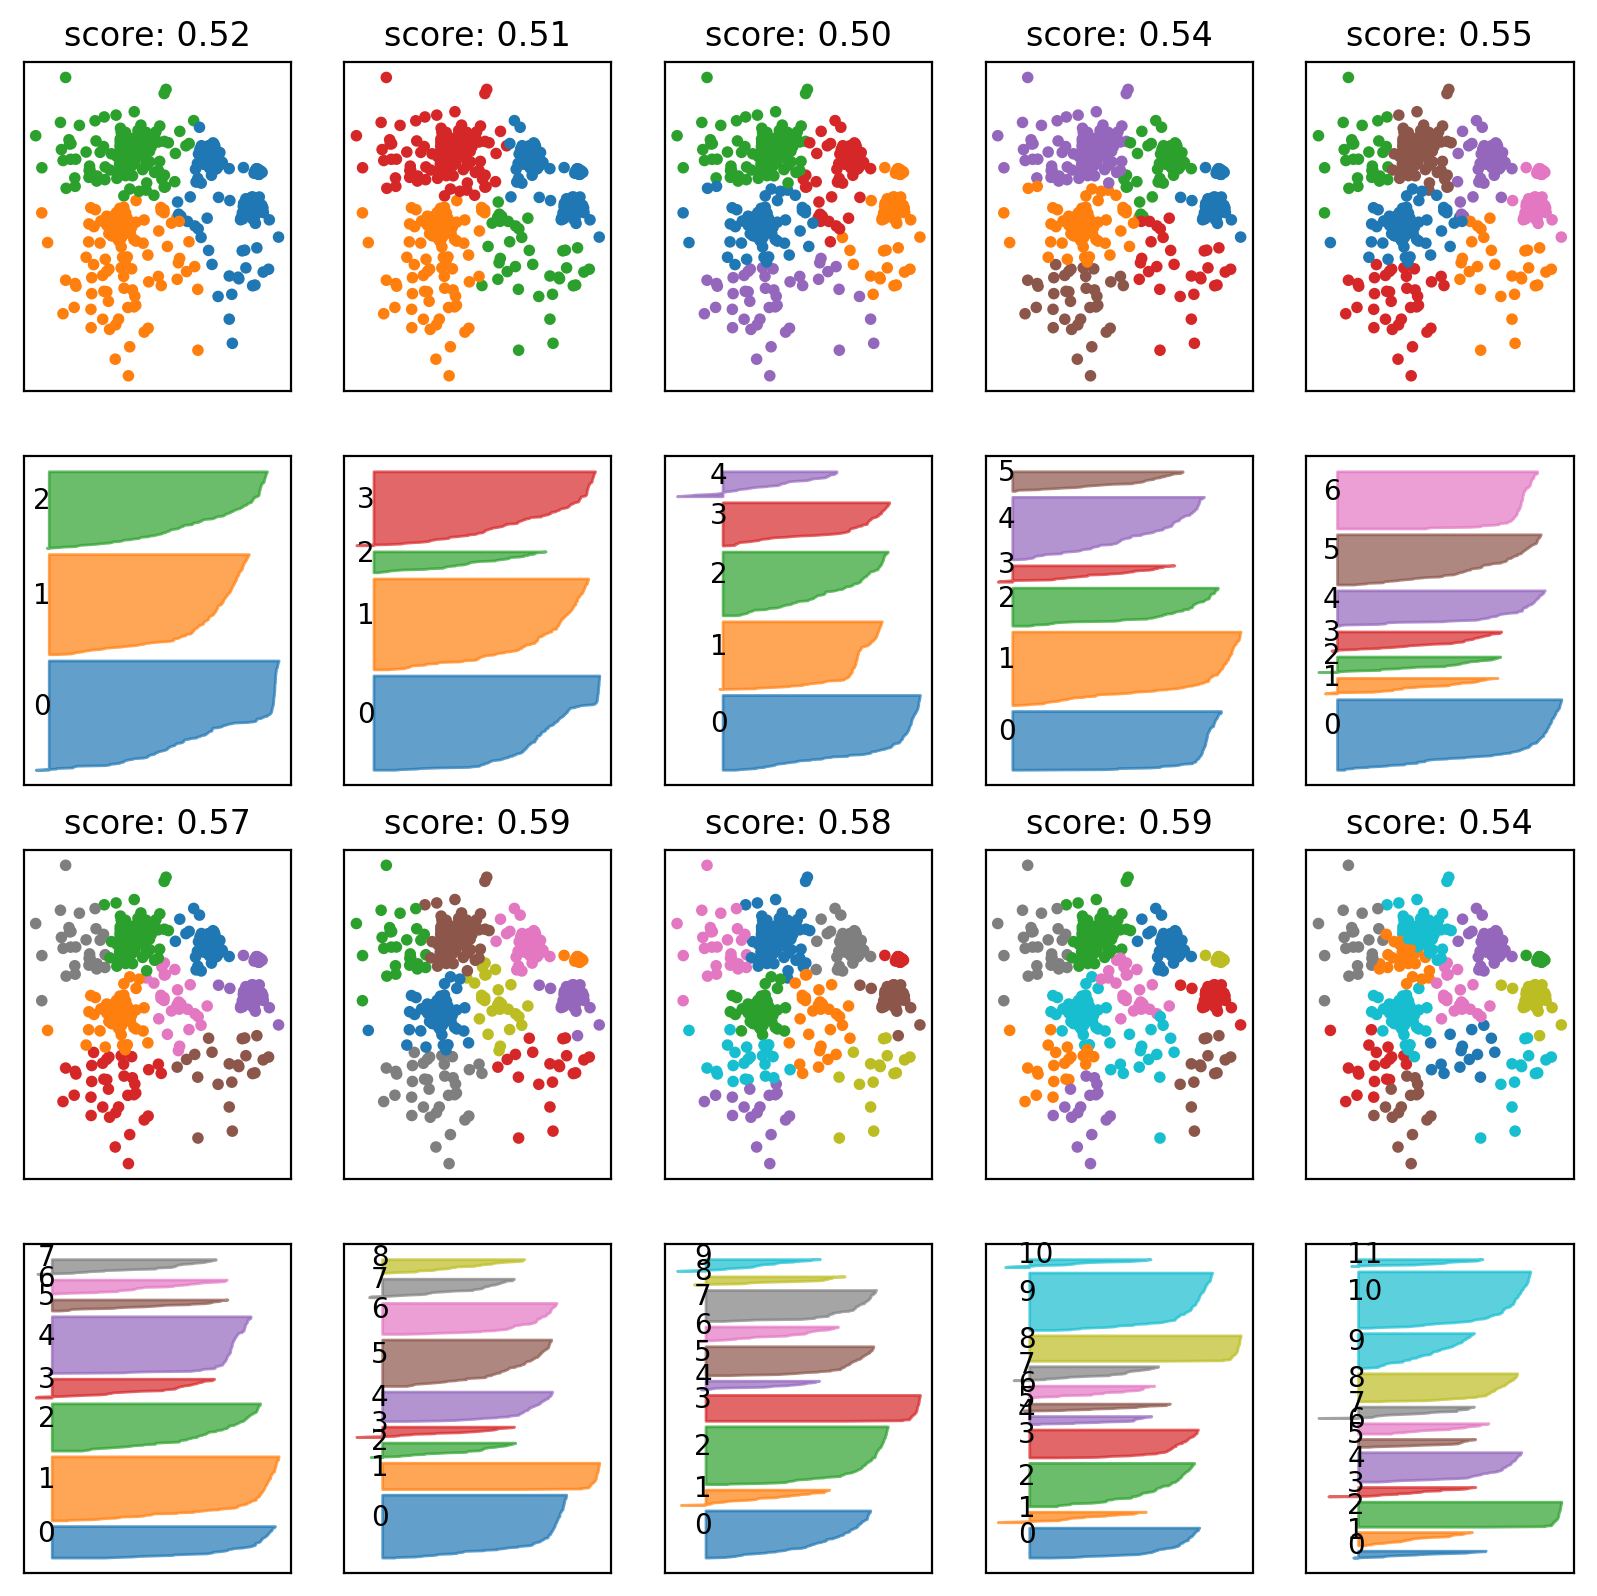

In [16]:
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 10))
axes = np.hstack([axes[:2], axes[2:]]).T

for ax, n_clusters in zip(axes, range(3, 13)):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    ax[0].scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(km.labels_), s=10)
    silhouette_plot(X, km.labels_, ax=ax[1])
    ax[0].set_title("score: {:.2f}".format(silhouette_score(X, km.labels_)))

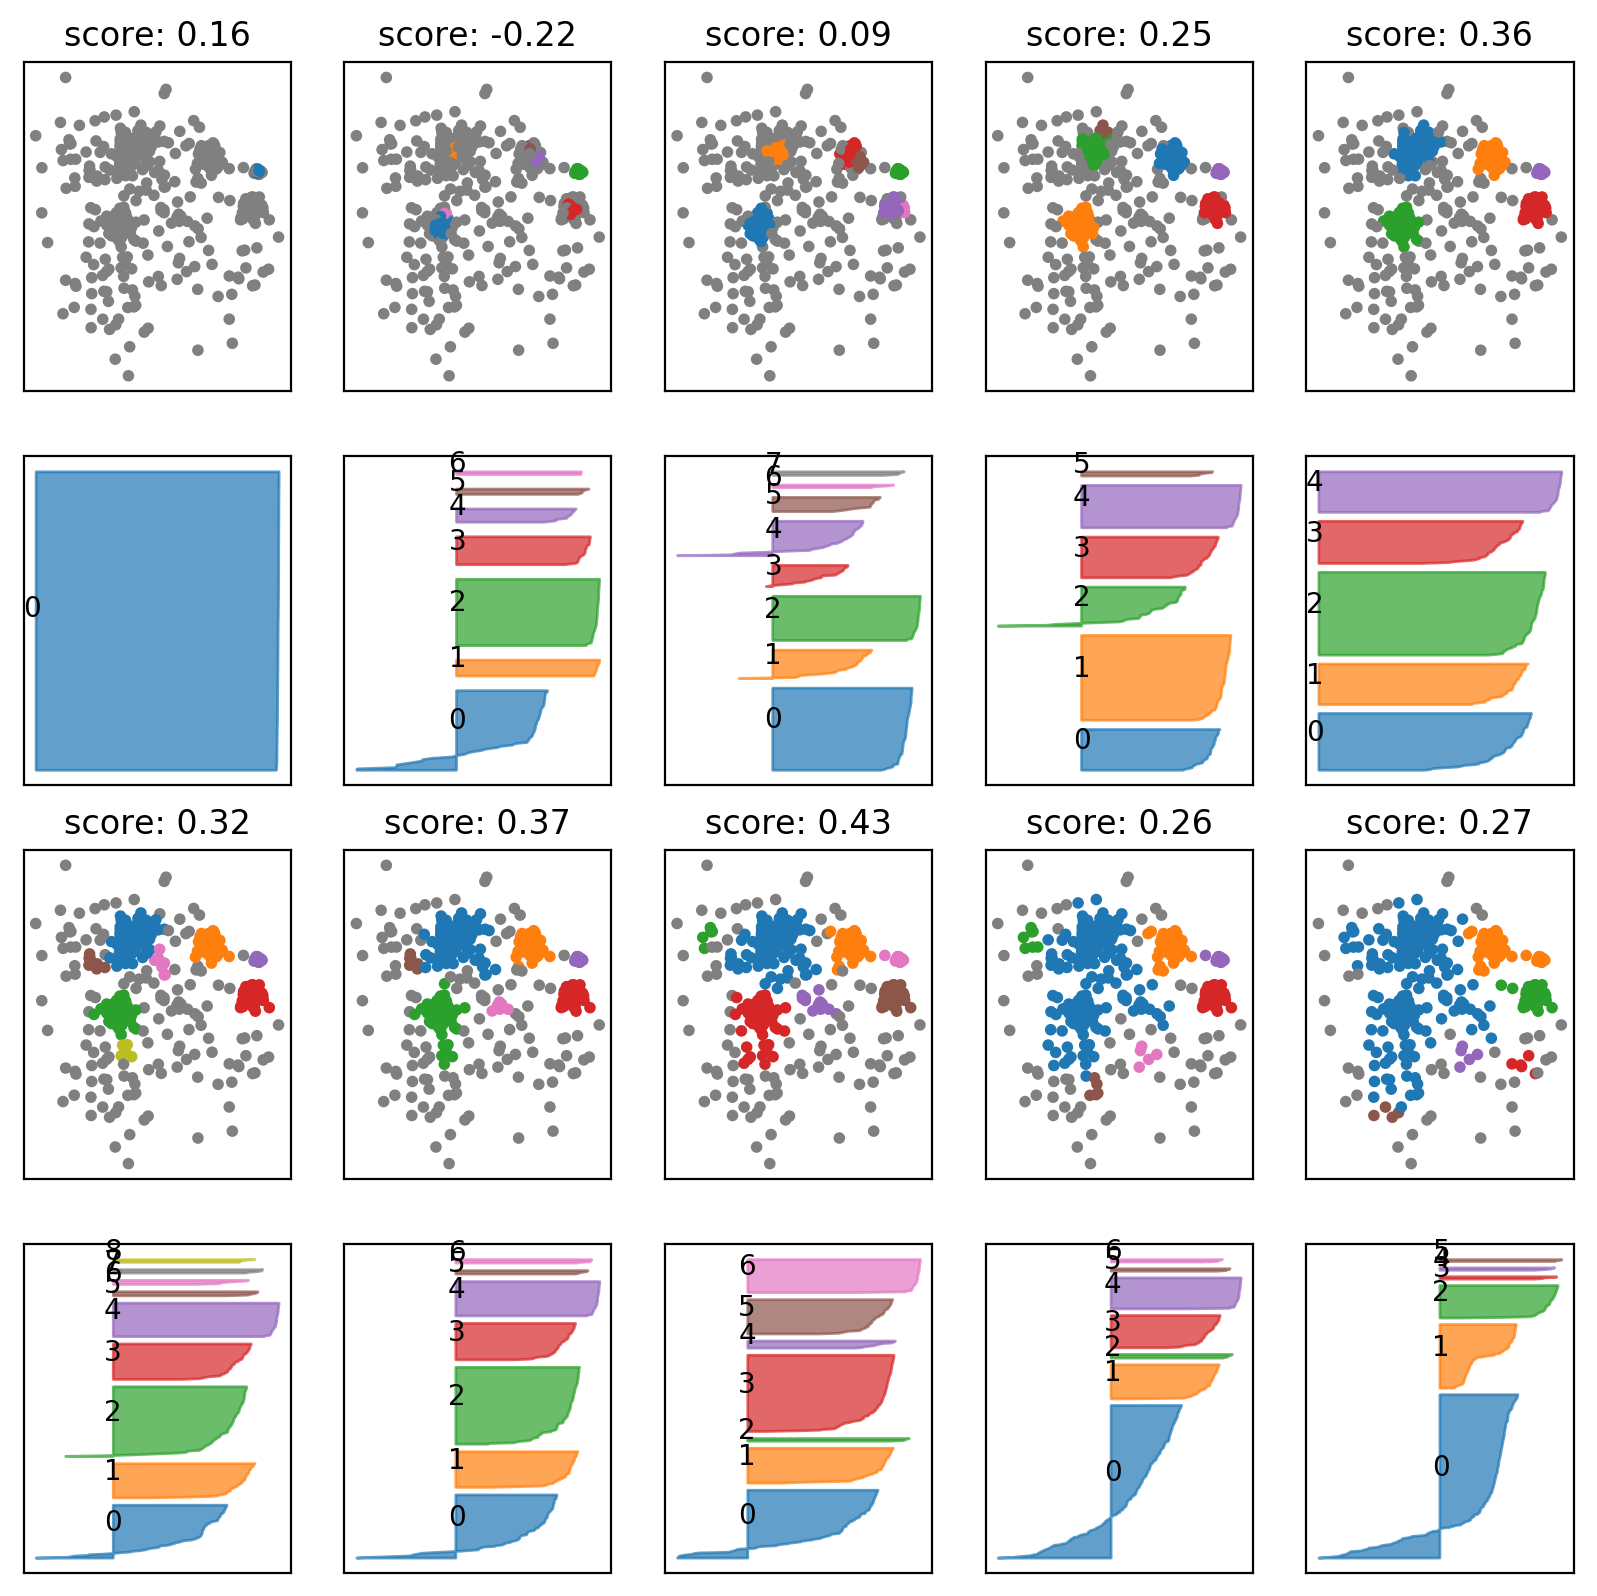

In [25]:
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 10))
axes = np.hstack([axes[:2], axes[2:]]).T

for ax, eps in zip(axes, np.linspace(0.1, 2, 10)):
    db = DBSCAN(eps=eps)
    db.fit(X)
    colors = plt.cm.Vega10(db.labels_)
    colors[db.labels_ == -1] = [.5, .5, .5, 1]
    ax[0].scatter(X[:, 0], X[:, 1], c=colors, s=10)
    silhouette_plot(X, db.labels_, ax=ax[1])
    ax[0].set_title("score: {:.2f}".format(silhouette_score(X, db.labels_)))

In [76]:
from sklearn.base import clone
from sklearn.utils import check_random_state

def cluster_stability(X, est, n_iter=20, random_state=None):
    labels = []
    indices = []
    for i in range(n_iter):
        # draw bootstrap samples, store indices
        sample_indices = rng.randint(0, X.shape[0], X.shape[0])
        indices.append(sample_indices)
        est = clone(est)
        if hasattr(est, "random_state"):
            # randomize estimator if possible
            est.random_state = rng.randint(1e5)
        X_bootstrap = X[sample_indices]
        est.fit(X_bootstrap)
        # store clustering outcome using original indices
        relabel = -np.ones(X.shape[0], dtype=np.int)
        relabel[sample_indices] = est.labels_
        labels.append(relabel)
    scores = []
    for l, i in zip(labels, indices):
        for k, j in zip(labels, indices):
            # we also compute the diagonal which is a bit silly
            in_both = np.intersect1d(i, j)
            scores.append(adjusted_rand_score(l[in_both], k[in_both]))
    return np.mean(scores)

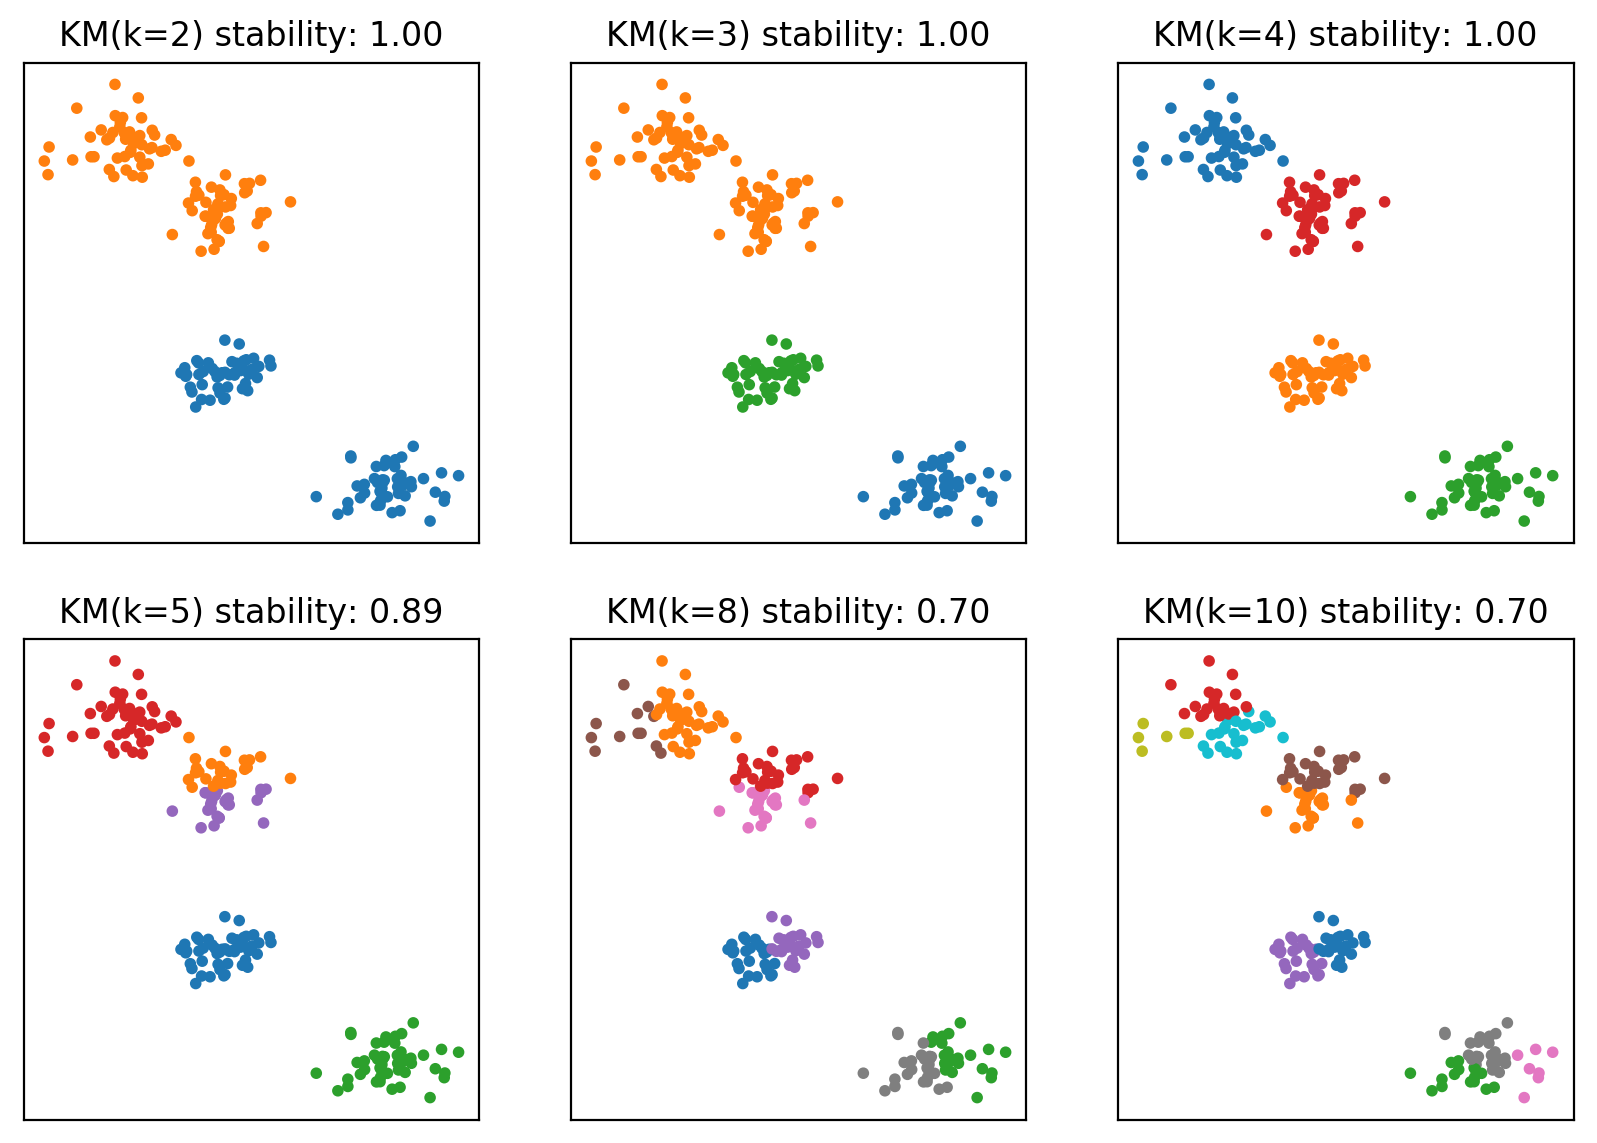

In [98]:
X, y = make_blobs(n_samples=200, centers=4, random_state=14)

fig, axes = plt.subplots(2, 3, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 7))
for ax, n_clusters in zip(axes.ravel(), [2, 3, 4, 5, 8, 10]):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    ax.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(km.labels_), s=10)
    ax.set_title("KM(k={}) stability: {:.2f}".format(n_clusters, cluster_stability(X, KMeans(n_clusters=n_clusters, n_init=10), n_iter=20)))

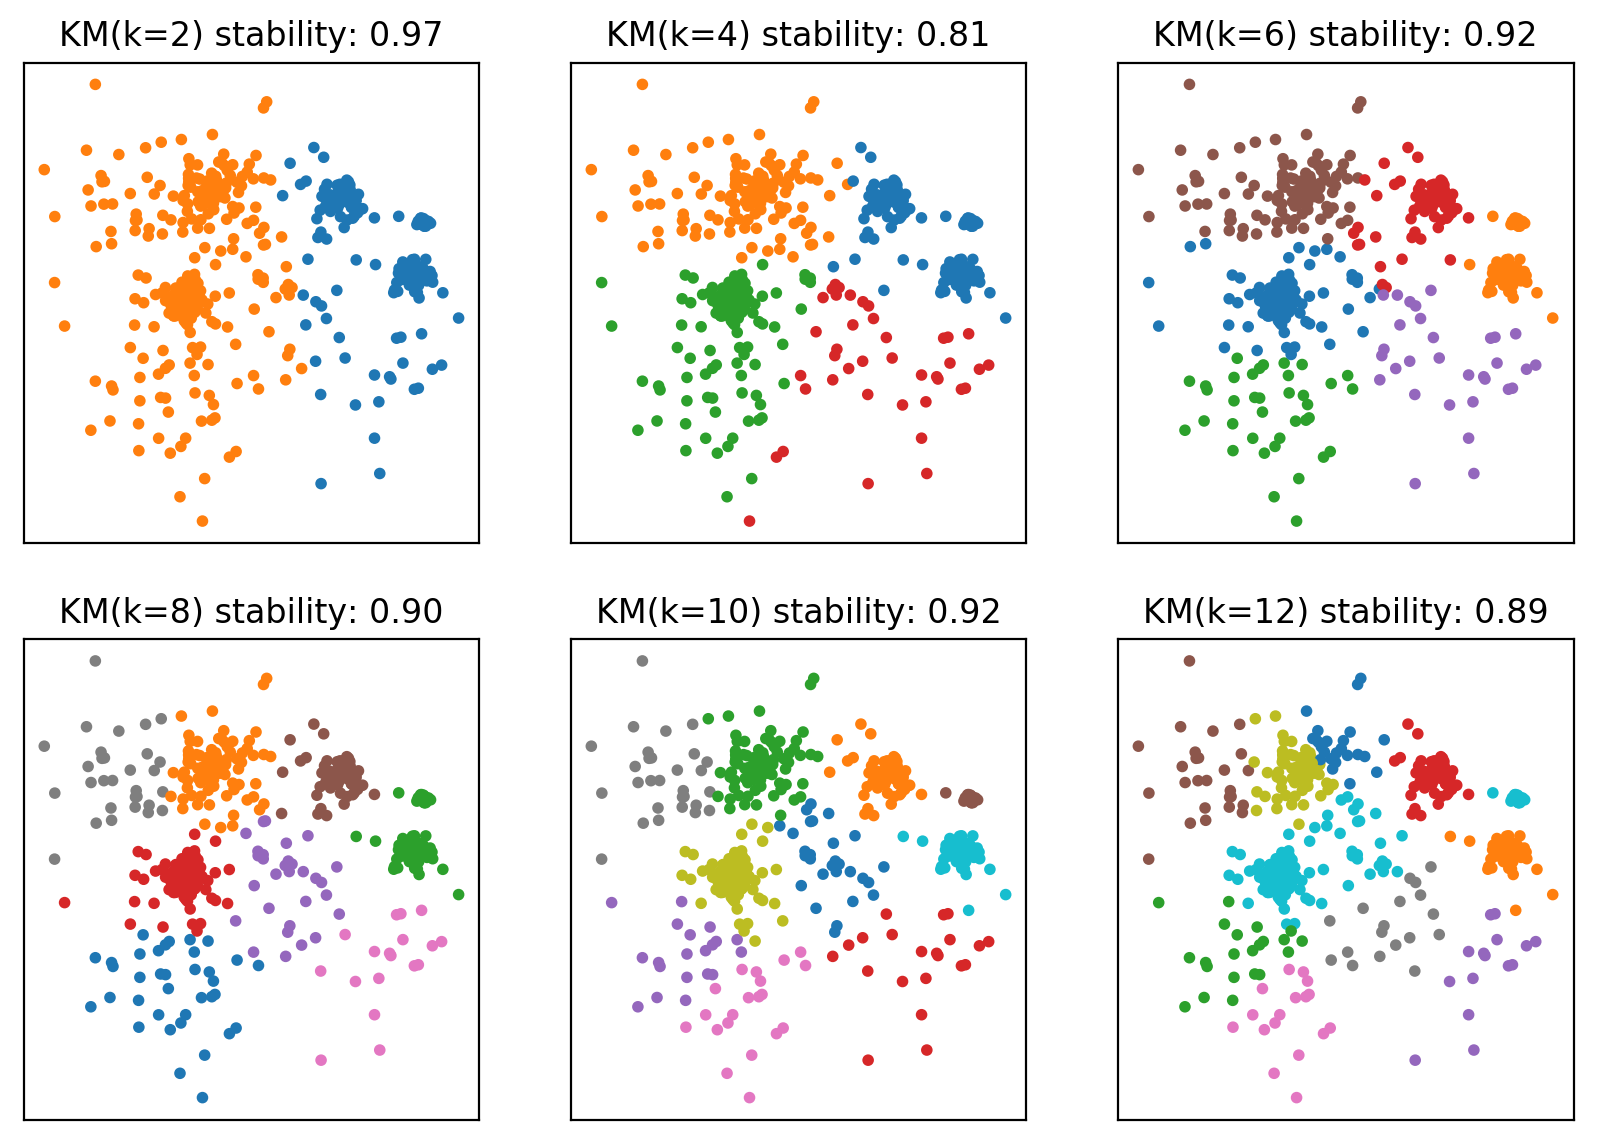

In [99]:
rng = np.random.RandomState(1)
X, y = make_blobs(n_samples=500, centers=10, random_state=rng, cluster_std=[rng.gamma(2) for i in range(10)])

fig, axes = plt.subplots(2, 3, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 7))
for ax, n_clusters in zip(axes.ravel(), [2, 4, 6, 8, 10, 12]):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    ax.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(km.labels_), s=10)
    ax.set_title("KM(k={}) stability: {:.2f}".format(n_clusters, cluster_stability(X, KMeans(n_clusters=n_clusters, n_init=10))))

In [118]:
stability = []
silhouette = []
ari = []
cluster_range = range(2, 30, 2)
for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters)
    stability.append(cluster_stability(digits.data, km))
    km.fit(digits.data)
    silhouette.append(silhouette_score(digits.data, km.labels_))
    ari.append(adjusted_rand_score(digits.target, km.labels_))

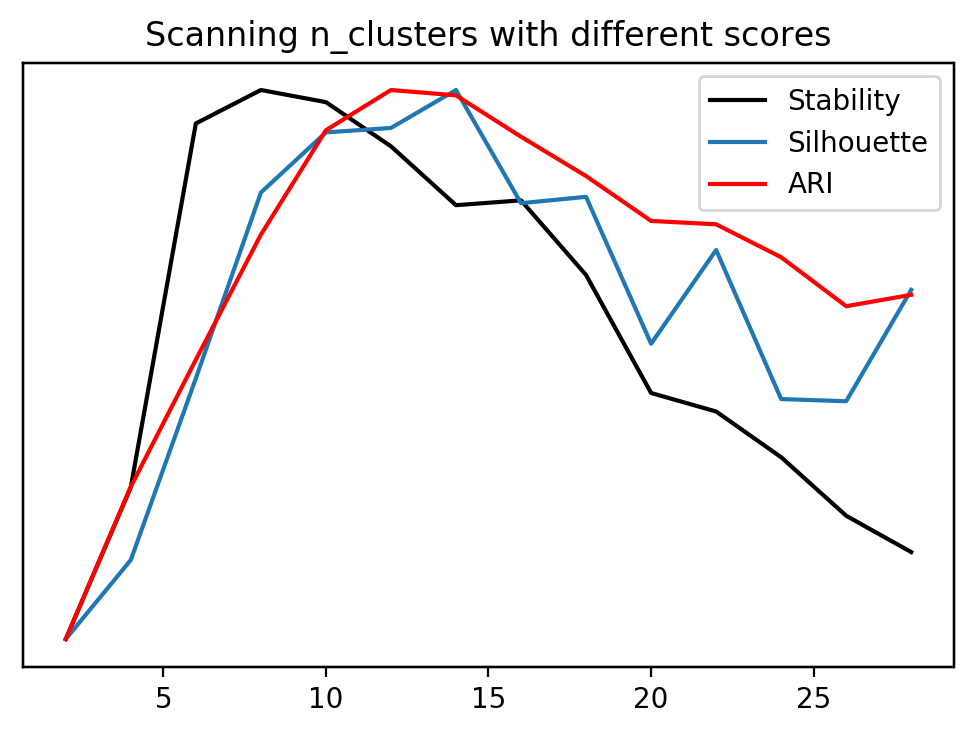

In [120]:
st, = plt.plot(cluster_range, stability, label="stability", c='k')
plt.yticks(())

si, = plt.twinx().plot(cluster_range, silhouette, label="silhouette")
plt.yticks(())

ar, = plt.twinx().plot(cluster_range, ari, label="ari", c='r')
plt.yticks(())
plt.legend([st, si, ar], ["Stability", "Silhouette", "ARI"])
plt.xlabel("n_clusters")
plt.title("Scanning n_clusters with different scores")

In [ ]:
# stability for different clustering algorithms on digits
from sklearn.cluster import Agglomeratrive

km_stability = []
agg_structured_stability = []
dbscan_stability = []

cluster_range = range(2, 30, 2)
for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters, n_init=10, init="random")
    km_stability.append(cluster_stability(X, km))
    agg_stability.append(cluster_stability(X, Agglomeratrive(n_clusters=n_clusters))

In [121]:
# adult

In [122]:

import os
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
adult_path = os.path.join("adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
data = data.drop("fnlwgt", axis=1)
data.head()

age          workclass   education  education-num       marital-status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           occupation    relationship    race   gender  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital-loss  hours-per-week  native-country  income  
0             0              40   United-States   <=50K  
1             0              13   United-States   <=50K  
2             0              40   United-States   <=50K  
3             0              40   United-States   <=50K  
4             0              40            Cuba   <=50K

In [126]:
data_ = data.drop("income", axis=1)
categorical = data_.columns[data_.dtypes != "int64"]
data_dummies = pd.get_dummies(data_[categorical],
                                        columns=categorical)

In [128]:
data_dummies.shape

(32561, 102)

In [139]:
# subsample the data. Still takes a while. Maybe MiniBatchKMeans would be more appropriate
X = data_dummies.values[::10]
X = scale(X)

/home/andy/checkout/scikit-learn/sklearn/utils/validation.py:427: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [144]:
stability = []
silhouette = []
ari = []
cluster_range = range(2, 30, 2)
for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters)
    stability.append(cluster_stability(X, km))
    km.fit(X)
    silhouette.append(silhouette_score(X, km.labels_))
    ari.append(adjusted_rand_score(data_.income[:10], km.labels_))

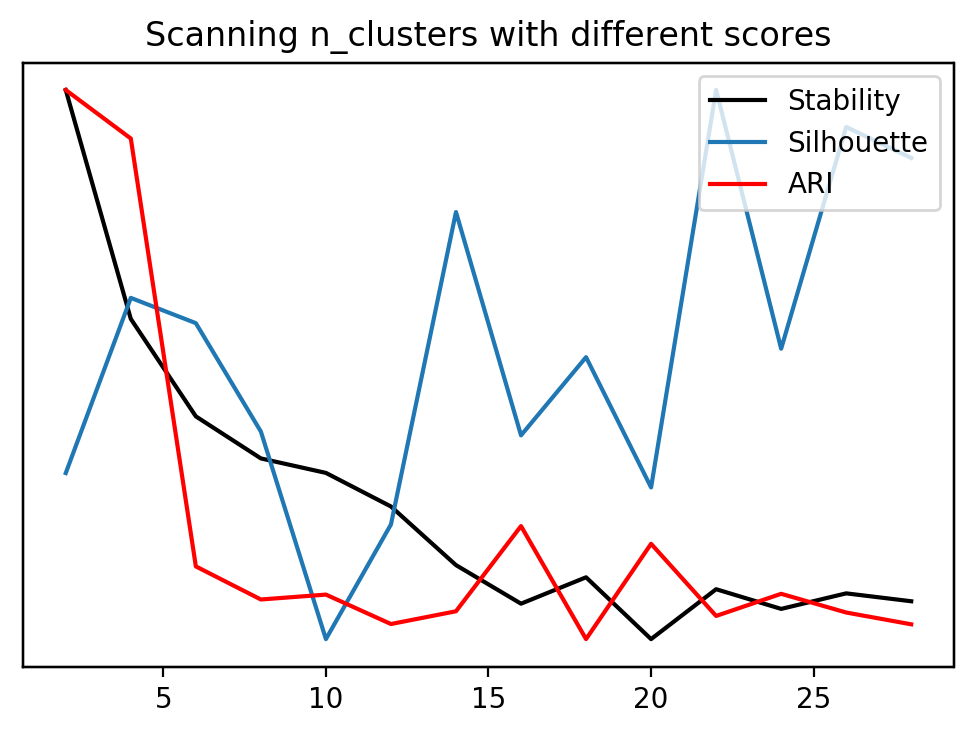

In [145]:
st, = plt.plot(cluster_range, stability, label="stability", c='k')
plt.yticks(())

si, = plt.twinx().plot(cluster_range, silhouette, label="silhouette")
plt.yticks(())

ar, = plt.twinx().plot(cluster_range, ari, label="ari", c='r')
plt.yticks(())
plt.legend([st, si, ar], ["Stability", "Silhouette", "ARI"])
plt.xlabel("n_clusters")
plt.title("Scanning n_clusters with different scores")

In [ ]:
# Breast Cancer

In [146]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [147]:
X = data.data
stability = []
silhouette = []
ari = []
cluster_range = range(2, 30, 2)
for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters, n_init=10, init="random")
    stability.append(cluster_stability(X, km), n_iters=10)
    km.fit(X)
    silhouette.append(silhouette_score(X, km.labels_))
    ari.append(adjusted_rand_score(data.target, km.labels_))

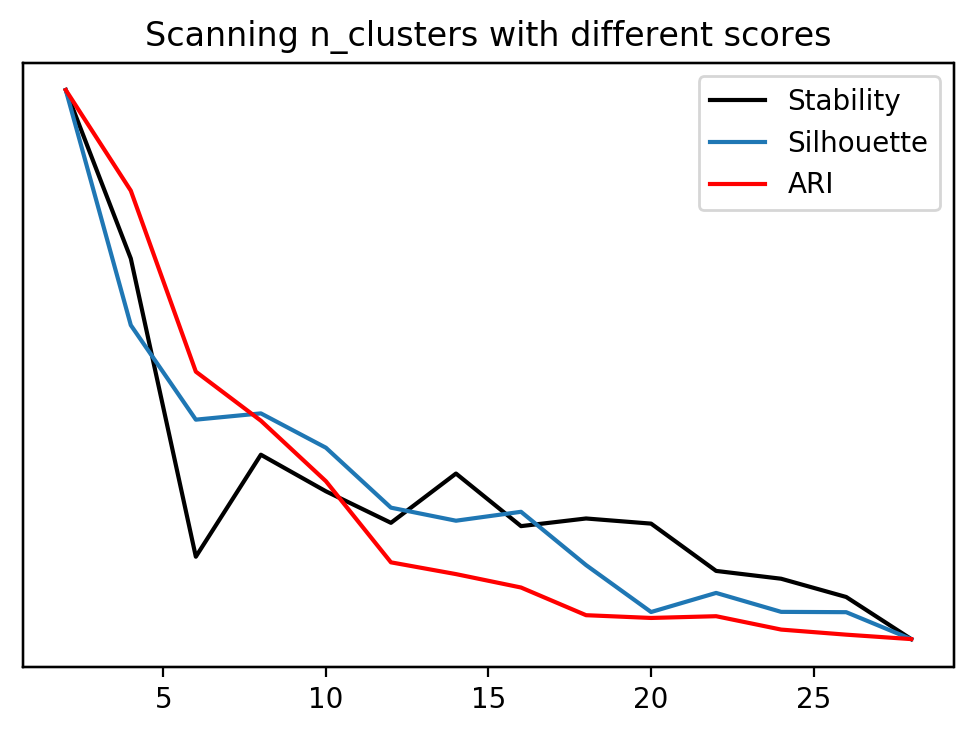

In [148]:
st, = plt.plot(cluster_range, stability, label="stability", c='k')
plt.yticks(())

si, = plt.twinx().plot(cluster_range, silhouette, label="silhouette")
plt.yticks(())

ar, = plt.twinx().plot(cluster_range, ari, label="ari", c='r')
plt.yticks(())
plt.legend([st, si, ar], ["Stability", "Silhouette", "ARI"])
plt.xlabel("n_clusters")
plt.title("Scanning n_clusters with different scores")

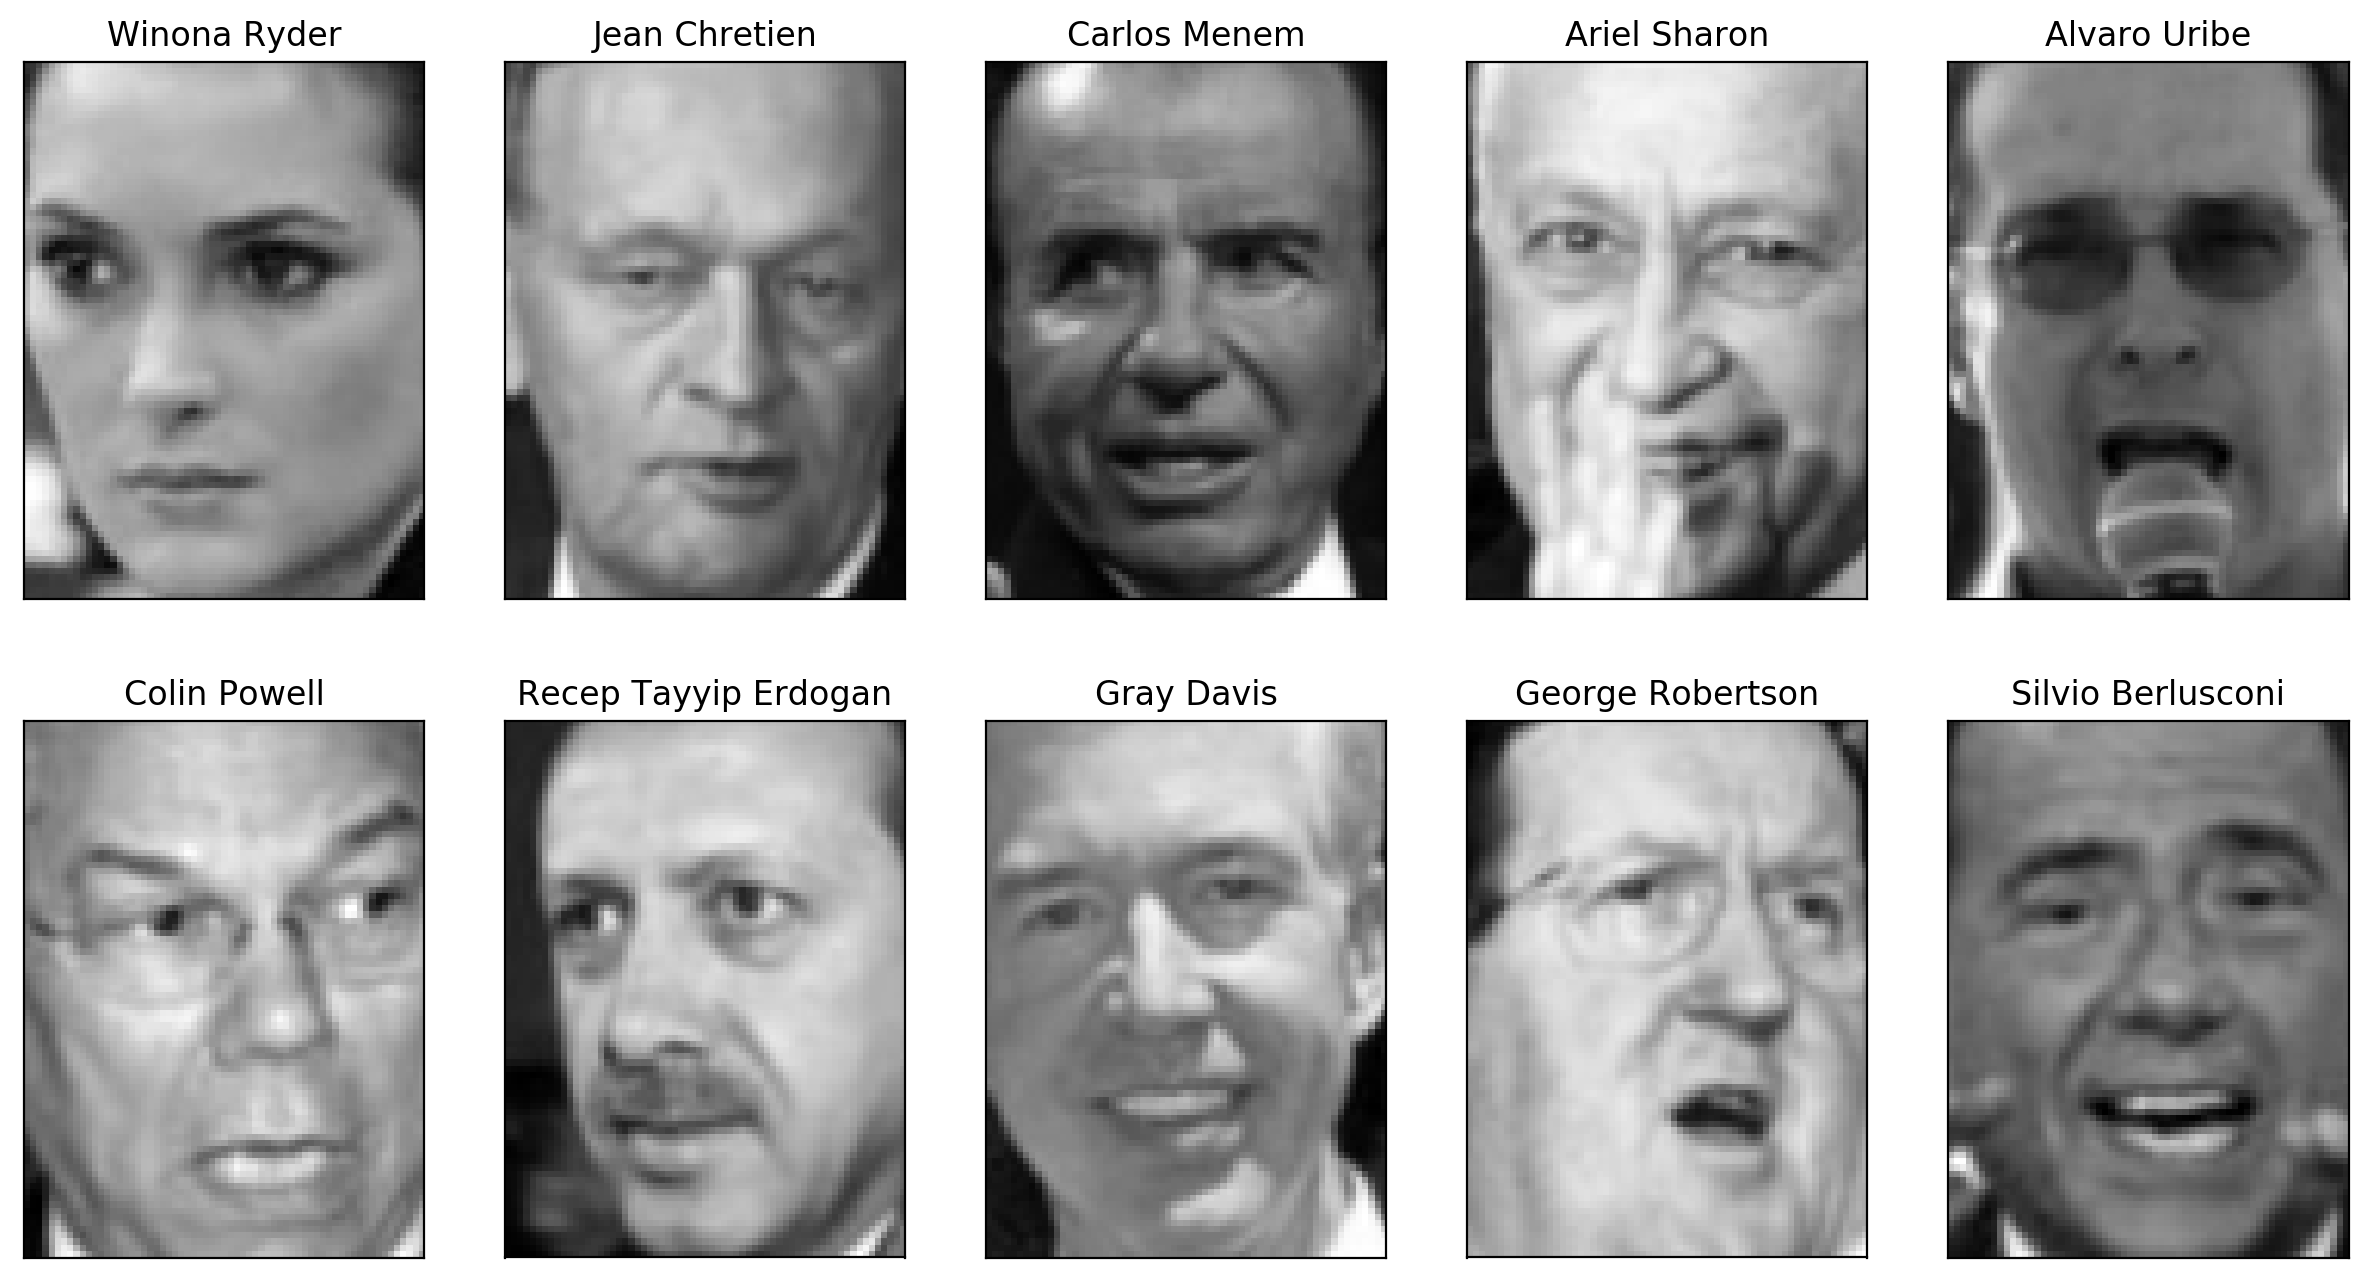

In [149]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap='gray')
    ax.set_title(people.target_names[target])

In [150]:
# have at most 50 images per preson - otherwise too much bush
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

In [ ]:
X = X_people
stability = []
silhouette = []
ari = []
cluster_range = range(2, 30, 2)
for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters, n_init=10, init="random")
    stability.append(cluster_stability(X, km))
    km.fit(X)
    silhouette.append(silhouette_score(X, km.labels_))
    ari.append(adjusted_rand_score(y_people, km.labels_))